In [1]:
# Project Title: Sentiment Analysis of Customer Reviews on Amazon Products

In [2]:
# Authors:  Tixa, Div, Nirali, Maharshi


# import Machine Learning Libraries

#Linear algebra
import numpy as np 

# data processing
# CSV file for example: pd.read_csv
import pandas as pd 

from pathlib import Path
from sklearn.model_selection import train_test_split

import bz2 

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames: print(os.path.join(dirname, filename))

In [3]:
# Read Database

#Amazon Dataset is used from Kaggle

path = Path("/kaggle/input/amazonreviews")

def get_data(file_name: Path):
    customer_reviews = bz2.BZ2File(file_name).readlines()
    customer_reviews = [review.decode("utf-8") for review in customer_reviews]
    res_target = {'1':'Negative', '2':'Positive'}
    
    label = [ res_target[label[9]] for label in customer_reviews]
    customer_reviews = [review[11:] for review in customer_reviews]
    df = pd.DataFrame(data = {"label":label, "reviews": customer_reviews})
    return df


In [4]:
# Training Data 

train = get_data('train.ft.txt.bz2').sample(140000, random_state=42)
test = get_data('test.ft.txt.bz2')

In [5]:
# length of train and test datasets

len(train), len(test)

(140000, 400000)

In [27]:
# Printing data with top 60 reviews 

train.head(60)

,label,reviews
2079998,Negative,Expensive Junk: This product consists of a pie...
1443106,Negative,"Toast too dark: Even on the lowest setting, th..."
3463669,Positive,Excellent imagery...dumbed down story: I enjoy...
2914699,Negative,Are we pretending everyone is married?: The au...
1603231,Negative,Not worth your time: Might as well just use a ...
2944012,Negative,Book reads like written for grade schoolers: I...
3403602,Negative,Jeanne de Florette & Manon of the Springs: I s...
1039142,Negative,Theater Projector Ceiling Mount: Would not fit...
431645,Positive,This import is sooooooooooo good: This is a gr...
694263,Negative,Garbage: The handle broke clean off after TWO ...


<AxesSubplot:>

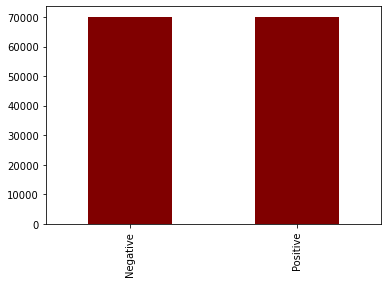

In [7]:
# plot bar graph for data visualization

train['label'].value_counts().plot(kind='bar', color='maroon')

<AxesSubplot:>

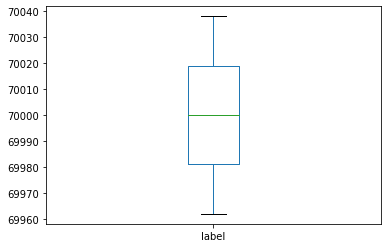

In [8]:
# plot box chart for data visualization
train['label'].value_counts().plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

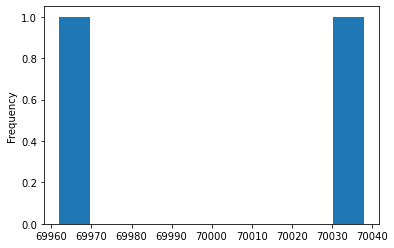

In [9]:
# plot histogram for data visualization

train['label'].value_counts().plot(kind='hist')

# Model

creating a model

In [10]:
#import libraries from Sklearn 

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

In [11]:
# label Encoder

vect_data = TfidfVectorizer(ngram_range=(1,2),
                      min_df=3, 
                      max_df=0.9, 
                      strip_accents='unicode', 
                      use_idf=1,
                      smooth_idf=1, 
                      sublinear_tf=1)

encoder = LabelEncoder()

In [12]:
# transforming data using fit_transform

X_train = vect_data.fit_transform(train['reviews'])
X_test = vect_data.transform(test['reviews'])
Y_train = encoder.fit_transform(train['label'])
Y_test = encoder.transform(test['label'])

In [13]:
# Logistical Regression

data_model = LogisticRegression(C=4, dual=True, solver='liblinear', random_state=42)
data_model.fit(X_train, Y_train)

LogisticRegression(C=4, dual=True, random_state=42, solver='liblinear')

In [14]:
# predicting probabilities 

predicts = data_model.predict_proba(X_test)

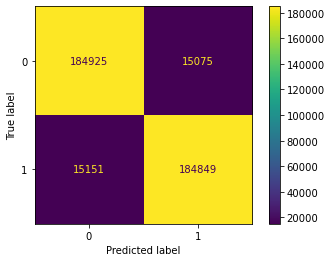

In [15]:
# Matrix 

plot_confusion_matrix(data_model, X_test, Y_test);

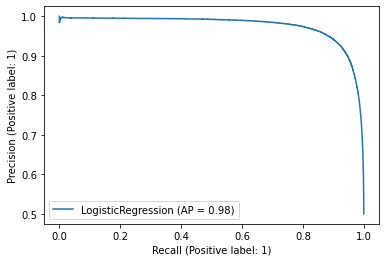

In [16]:
# plot curve 

plot_precision_recall_curve(data_model, X_test, Y_test);

In [34]:
# User Interactive model for providing outcome based on review enter by user

print("Enter Review:")
user_input = vect_data.transform([input()])
predict2 = data_model.predict_proba(user_input)
predict3 = data_model.predict(user_input)

if predict3[0]: 
    print("\nSentimental Analysis""\nThis review is Positive"  " \U0001f600" "\nSentiment Score:", predict2[0][1])



else:
    print("\nSentimental Analysis\nThis review is Negative" " \U0001f621" "\nSentiment Score:", predict2[0][1])

Enter Review:
I dislike this product

Sentimental Analysis
This review is Negative 😡
Sentiment Score: 0.0568843809773693
